# Session 1: part 2
<a href="https://colab.research.google.com/github/ntu-dl-bootcamp/deep-learning-2024/blob/main/session1/session1_p2_student.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>


We will apply the knowledge from previous session to analyze a dataset of houses. This dataset is obtained from the Coursera machine learning foundations course (https://www.coursera.org/learn/ml-foundations/supplement/RP8te/predicting-house-prices-assignment), a highly recommended course. It can be downloaded at https://d396qusza40orc.cloudfront.net/phoenixassets/home_data.csv.

__Exercises__: Just follow along this notebook, exercises are indicated with exceptions (`raise` keyword). You are also invited to play with the code, discuss with your colleagues and ask questions to the instructors.

First we load the data and import the libraries we will use.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [65]:
# Download the file
!rm -f home_data.csv
!wget https://raw.githubusercontent.com/ntu-dl-bootcamp/deep-learning-2024/main/session1/home_data.csv
# Load home_data.csv into a dataframe
homes = pd.read_csv('home_data.csv')
homes.head()

--2024-11-01 08:29:24--  https://raw.githubusercontent.com/ntu-dl-bootcamp/deep-learning-2024/main/session1/home_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598020 (2.5M) [text/plain]
Saving to: ‘home_data.csv’

home_data.csv       100%[===================>]   2.48M  11.3MB/s    in 0.2s    

2024-11-01 08:29:25 (11.3 MB/s) - ‘home_data.csv’ saved [2598020/2598020]



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can see that we have 21 features and 21613 samples.

In [66]:
homes.shape

(21613, 21)

# Data analysis

Now that we have the data loaded, we can start exploring it.

Text(0.5, 1.0, 'Histogram of Price')

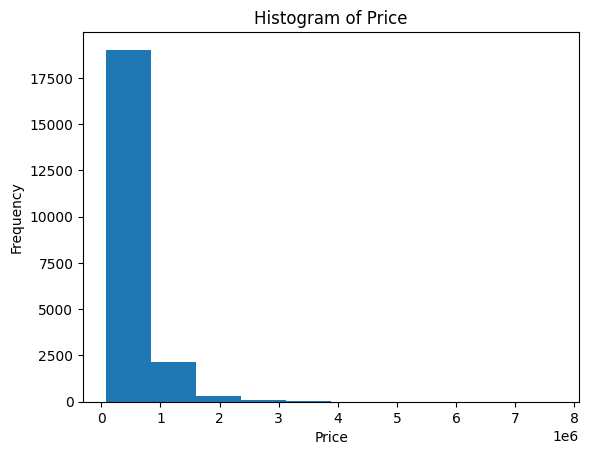

In [67]:
# Plot a histogram of price
# raise NotImplementedError("TODO: plot a histogram of price")
plt.hist(homes['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

Text(0.5, 1.0, 'Price vs Living Area')

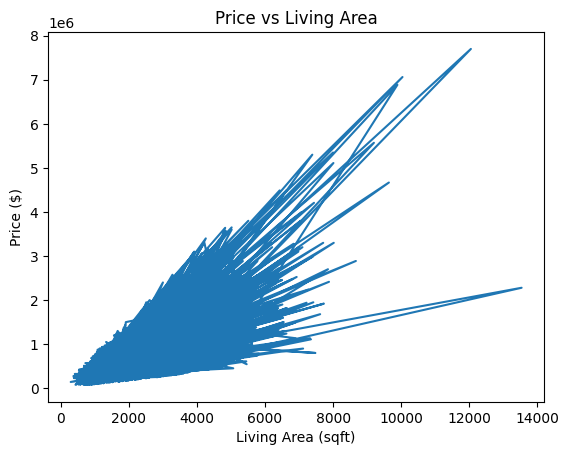

In [68]:
import matplotlib.pyplot as plt

# Plot square feet vs price of house
# raise NotImplementedError("TODO: plot square feet vs price of house")
plt.plot(homes['sqft_living'], homes['price'])
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price ($)')
plt.title('Price vs Living Area')

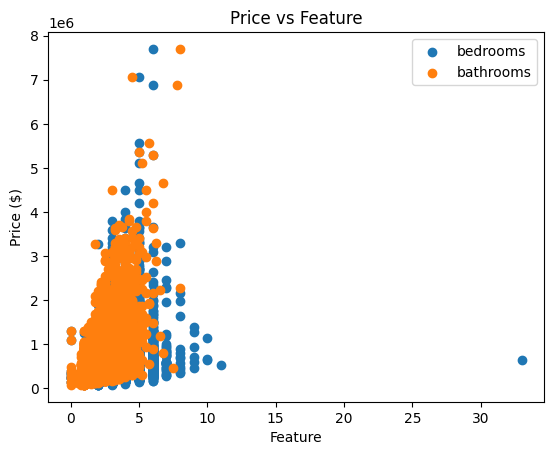

In [72]:
# Also plot bedrooms and bathrooms vs price
# TODO Find out how to add a legend
# raise NotImplementedError("TODO: add a legend in the below plot")
plt.scatter(homes['bedrooms'], homes['price'], label='bedrooms')
plt.scatter(homes['bathrooms'], homes['price'], label='bathrooms')
plt.xlabel('Feature')
plt.ylabel('Price ($)')
plt.title('Price vs Feature')
plt.legend()

In [73]:
# Exercise. generate summaries of the data for all columns except id
# Is there a pandas API that seems helpful?
# Check the docs at https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
# raise NotImplementedError("TODO: generate summaries of the data for all columns except id")
homes.iloc[:,1:].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [75]:
# Exercise. Find the most expensive house and the biggest house
# raise NotImplementedError("TODO: find the most expensive house and the biggest house")
print("The most expensive house is {}, with the price of {}".format(homes['price'].idxmax(), homes['price'].max()))
print("The biggest house is {}, with the price of {}".format(homes['sqft_living'].idxmax(), homes['sqft_living'].max()))

The most expensive house is 7252, with the price of 7700000
The biggest house is 12777, with the price of 13540


In [77]:
# Exercise. Find the average price, the median price, and the average price of a 3 bedroom house
# raise NotImplementedError("TODO: Find the average price, the median price, and the average price of a 3 bedroom house")
three_bedroom_homes = homes[homes['bedrooms']==3]
print("The average price:", three_bedroom_homes['price'].mean())
print("The median price:", three_bedroom_homes['price'].median())

The average price: 466232.07949918567
The median price: 413000.0


# Linear regression

We will now use a linear regression model to predict the housing prices. As in the typical machine learning workflow, we perform the following steps:
1. Split the data into training and test sets
2. Train the model on the training set
3. Evaluate the model on the test set

We will use the scikit-learn library to perform the linear regression. Scikit-learn is a very popular library for machine learning in Python. It provides a wide range of machine learning algorithms and tools for data analysis and visualization. It is also very well documented, so it is a good idea to get familiar with it.

For linear regression, we can use the `LinearRegression` class from scikit-learn. We will use the `fit` method to train the model and the `predict` method to make predictions.

In [78]:
# set seed for reproducibility
np.random.seed(0)
train_homes, test_homes = train_test_split(homes, test_size=0.2)

In [80]:
# we can check the size of the train and test sets
print(train_homes.shape)
print(test_homes.shape)

(17290, 21)
(4323, 21)


In [81]:
# build linear regression model from sqft_living to price

# fit the model
sqft_model = LinearRegression()
sqft_model.fit(train_homes[['sqft_living']], train_homes['price'])

# make predictions on the test data
pred_homes = sqft_model.predict(test_homes[['sqft_living']])
pred_homes.shape

(4323,)

In [82]:
# Now we can analyze the model performance.

# The coefficients
print("Coefficients:", sqft_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" %  np.sqrt(mean_squared_error(test_homes['price'], pred_homes)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_homes['price'], pred_homes))

Coefficients: [283.96855737]
Mean squared error: 248879.06
Coefficient of determination: 0.48


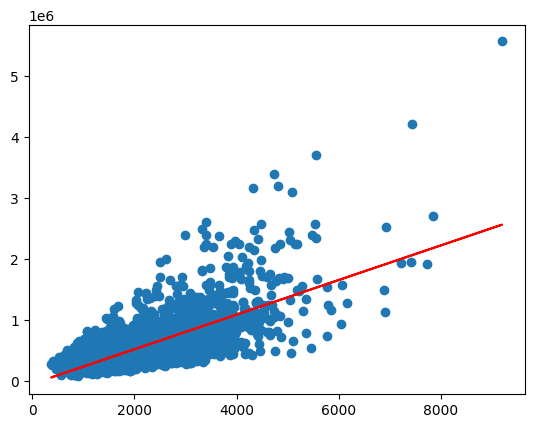

In [83]:
# plot the predictions and the original data
plt.scatter(test_homes['sqft_living'], test_homes['price'])
plt.plot(test_homes['sqft_living'], pred_homes, color='red')

We achieve a relatively satisfactory result. Let's see how we can improve it. Perhaps we can use more features? Try to add a few more features and compare the results. Can you improve the performance?

In [87]:
# raise NotImplementedError("TODO: improve the model by adding more features")
# build linear regression model from 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode' to price

# fit the model
new_model = LinearRegression()
X = train_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','zipcode']]
X_test = test_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','zipcode']]
new_model.fit(X, train_homes['price'])

# make predictions on the test data
new_pred_homes = new_model.predict(X_test)
new_pred_homes.shape

(4323,)

In [88]:
# Now we can analyze the new model performance.

# The coefficients
print("Coefficients:", new_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" %  np.sqrt(mean_squared_error(test_homes['price'], new_pred_homes)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_homes['price'], new_pred_homes))

Coefficients: [-5.66006330e+04  1.10870936e+04  3.20408369e+02 -2.89499140e-01
 -2.41800491e+03  6.17971071e+02]
Mean squared error: 244004.77
Coefficient of determination: 0.50


__Discuss__:
1. What is the difference between the training and test sets? Why do we need both?
2. Why is the `multi_model` performing better than the original `sqft_model`?


# Linear Regression with Pytorch

Now we will use the same dataset to perform linear regression using PyTorch. We will use the same features as before, but we will use a different model. Instead of using a linear model, we will use a neural network with no hidden layer.

Do not try to understand all the details of the code below. The important thing is to understand the general structure of the code and the main steps of the training process:
1. Load the data
2. Define the model, the loss function and the optimizer. These concepts will be introduced in more details in the next session. For now, just think of the model as a function that takes the input and returns the output. The loss function is a function that measures how good the model is. The optimizer is an algorithm that tries to minimize the loss function.
5. Train the model for a number of epochs. Train consists of using the loss function to measure the error of the model and the optimizer to update the parameters of the model to reduce the error.
6. Evaluate the model. Reuse the loss function to measure the error of the model on the test set.



In [89]:
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import random
import os

def make_training_deterministic(seed: int = 0):
    '''Set random seed for reproducibility'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

In [90]:
# Make the model training deterministic
make_training_deterministic(0)

# Load the data
data = homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']]
scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(data), dtype=torch.float32)
y = torch.tensor(homes['price'].values.reshape(-1, 1), dtype=torch.float32)

# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [91]:
# define the model
model = nn.Linear(X.shape[1], y.shape[1])

# define the loss function
loss_fn = nn.MSELoss()

# define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [92]:
# The training loop
n_epochs = 500 # number of epochs to run
train_loss = []
for epoch in range(n_epochs):
    model.train() # set model to training mode
    # forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    # update weights
    optimizer.step()
    # save loss for plotting
    train_loss.append(loss.item())

In [93]:
# The test loop
model.eval() # set model to evaluation mode
y_pred = model(X_test)
loss = loss_fn(y_pred, y_test)
print("Root mean squared error: %.2f" % np.sqrt(loss.item()))
print("r2_score: %.2f" % r2_score(y_test.detach().numpy(), y_pred.detach().numpy()))

Root mean squared error: 259353.36
r2_score: 0.51


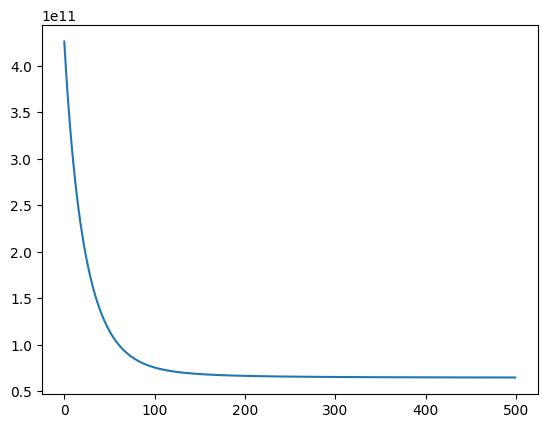

In [94]:
# plot the train loss
plt.plot(train_loss)

Note that we are able to achieve very similar results using PyTorch. It turns out that a one layer neural network is equivalent to a linear regression model. You can read more about this on https://deeplearning.neuromatch.io/tutorials/W1D2_LinearDeepLearning/student/W1D2_Tutorial3.html#bonus (see Bonus section).